In [14]:
import librosa, numpy as np
import pathlib as p
from matplotlib import pyplot as plt
from librosa import display
from utils.audio_recorder import RECORDINGS_PATH


SAMPLE_RATE = 16000   # per second

### non-wake word data processing

In [ ]:
non_wake_mfcc = []
# no_of_plots = 30
sub_folder = "non-wake"
n_mfcc=20   # number of features

plot_count = 0
chop_duration = 2   # every 2 seconds
for file in p.Path.joinpath(RECORDINGS_PATH, sub_folder).glob("*"):
  y, sr = librosa.load(file, sr=SAMPLE_RATE)

  chop_length = chop_duration * SAMPLE_RATE   # no. of samples per chop
  for i, chop_number in enumerate(range(int(y.shape[0]//chop_length))):
    mfcc = librosa.feature.mfcc(y=y[i*chop_length:(i+1)*chop_length], sr=sr, n_mfcc=n_mfcc)
    non_wake_mfcc.append(mfcc)  
  plot_count += 1


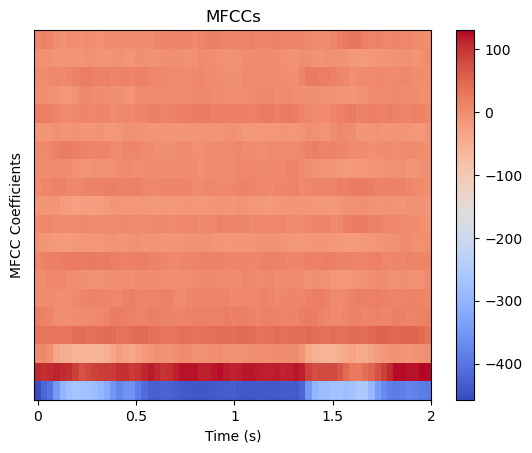

In [29]:
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
librosa.display.specshow(non_wake_mfcc[0], sr=SAMPLE_RATE, x_axis='time')
plt.colorbar()
plt.title("MFCCs")
plt.xlabel("Time (s)")
plt.ylabel("MFCC Coefficients")
plt.show()

### wake word data pre-processing

In [33]:
wake_mfcc = []
# no_of_plots = 30
sub_folder = "wake"
n_mfcc=20   # number of features

chop_duration = 2   # first 2 seconds only
for file in p.Path.joinpath(RECORDINGS_PATH, sub_folder).glob("*"):
  y, sr = librosa.load(file, sr=SAMPLE_RATE)

  for i, chop_number in enumerate(range(int(y.shape[0]//chop_length))):
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    wake_mfcc.append(mfcc)


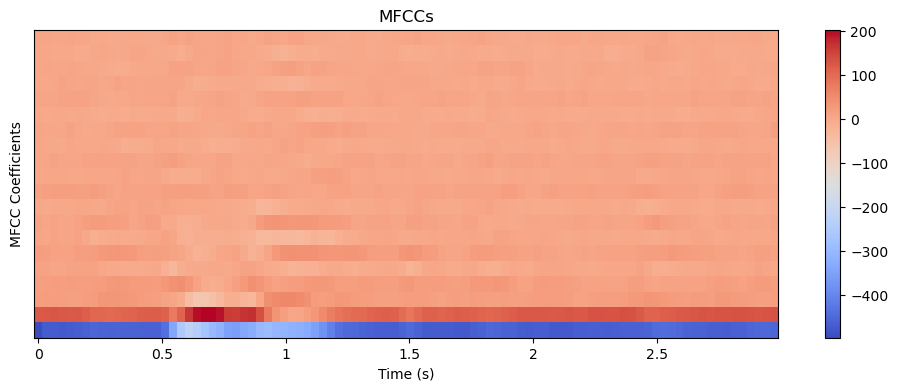

In [35]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(wake_mfcc[1], sr=SAMPLE_RATE, x_axis='time')
plt.colorbar()
plt.title("MFCCs")
plt.xlabel("Time (s)")
plt.ylabel("MFCC Coefficients")
plt.show()

In [10]:
import torch


audio_dataset = torch.Tensor(audio_data)
dataset = torch.utils.data.TensorDataset(audio_dataset, torch.zeros(audio_dataset.shape[0]))


NameError: name 'audio_data' is not defined